# YOLO Balatro Card Detection - Prediction and Visualization

In [2]:
from ultralytics import YOLO
import os

# Global configuration
SAVE_PREDICTIONS = True  # Set to False to disable saving
OUTPUT_DIR = 'prediction_outputs'  # Directory to save results

# Create output directory if it doesn't exist
if SAVE_PREDICTIONS and not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f'Created output directory: {OUTPUT_DIR}')

# Load your trained model
model_path = '../../runs/v2-balatro-entities-2000-epoch/weights/best.pt'
model = YOLO(model_path)

print(f'Model loaded from: {model_path}')
print(f'Model classes: {model.names}')
print(f'Save predictions: {SAVE_PREDICTIONS}')
if SAVE_PREDICTIONS:
    print(f'Output directory: {OUTPUT_DIR}')

Model loaded from: ../../runs/v2-balatro-entities-2000-epoch/weights/best.pt
Model classes: {0: 'card_description', 1: 'card_pack', 2: 'joker_card', 3: 'planet_card', 4: 'poker_card_back', 5: 'poker_card_description', 6: 'poker_card_front', 7: 'poker_card_stack', 8: 'spectral_card', 9: 'tarot_card'}
Save predictions: True
Output directory: prediction_outputs


In [3]:
import os

# Test with available frame images
test_images = [
    '../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg',
    '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00067.jpg',
    '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_01234.jpg',
    '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00169.jpg',
    '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00495.jpg',
    '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00519.jpg',
]

# Check which images exist
available_images = [img for img in test_images if os.path.exists(img)]
print(f'Available test images: {available_images}')

Available test images: ['../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00067.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_01234.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00169.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00495.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00519.jpg']


In [4]:
import cv2
import matplotlib.pyplot as plt


# Advanced visualization with different colors for different classes
def visualize_predictions_advanced(image_path, model, conf_threshold=0.5):
    """
    Advanced visualization with different colors for different classes
    """
    # Color palette for different classes
    colors = [
        (255, 0, 0),  # Red
        (0, 255, 0),  # Green
        (0, 0, 255),  # Blue
        (255, 255, 0),  # Yellow
        (255, 0, 255),  # Magenta
        (0, 255, 255),  # Cyan
        (255, 128, 0),  # Orange
        (128, 0, 255),  # Purple
    ]

    # Run prediction
    results = model(image_path, conf=conf_threshold)

    # Load the original image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_with_boxes = image_rgb.copy()

    # Process results
    class_counts = {}

    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                # Get box coordinates
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

                # Get confidence and class
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())
                class_name = model.names[cls]

                # Count classes
                class_counts[class_name] = class_counts.get(class_name, 0) + 1

                # Get color for this class
                color = colors[cls % len(colors)]

                # Draw bounding box
                cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 3)

                # Draw label with confidence
                label = f'{class_name}: {conf:.2f}'
                label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]
                cv2.rectangle(
                    image_with_boxes,
                    (x1, y1 - label_size[1] - 10),
                    (x1 + label_size[0], y1),
                    color,
                    -1,
                )
                cv2.putText(
                    image_with_boxes,
                    label,
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (255, 255, 255),
                    2,
                )

    # Display results
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image', fontsize=16)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_with_boxes)
    plt.title(f'Predictions (conf > {conf_threshold})', fontsize=16)
    plt.axis('off')

    plt.tight_layout()

    # Save if enabled
    if SAVE_PREDICTIONS:
        image_name = os.path.basename(image_path).split('.')[0]
        # Save matplotlib figure
        save_path = os.path.join(OUTPUT_DIR, f'{image_name}_advanced_prediction.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f'Visualization saved to: {save_path}')

        # Save annotated image only
        annotated_path = os.path.join(OUTPUT_DIR, f'{image_name}_annotated.jpg')
        image_bgr = cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR)
        cv2.imwrite(annotated_path, image_bgr)
        print(f'Annotated image saved to: {annotated_path}')

    plt.show()

    # Print detection summary
    print('\nClass Summary:')
    for class_name, count in class_counts.items():
        print(f'  {class_name}: {count} detections')

    return results

Running prediction on: ../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg: 320x640 2 joker_cards, 1 poker_card_stack, 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 45.5ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/mobile_nekomeowww_2025_09_19_21_54_out_00197_advanced_prediction.png
Annotated image saved to: prediction_outputs/mobile_nekomeowww_2025_09_19_21_54_out_00197_annotated.jpg


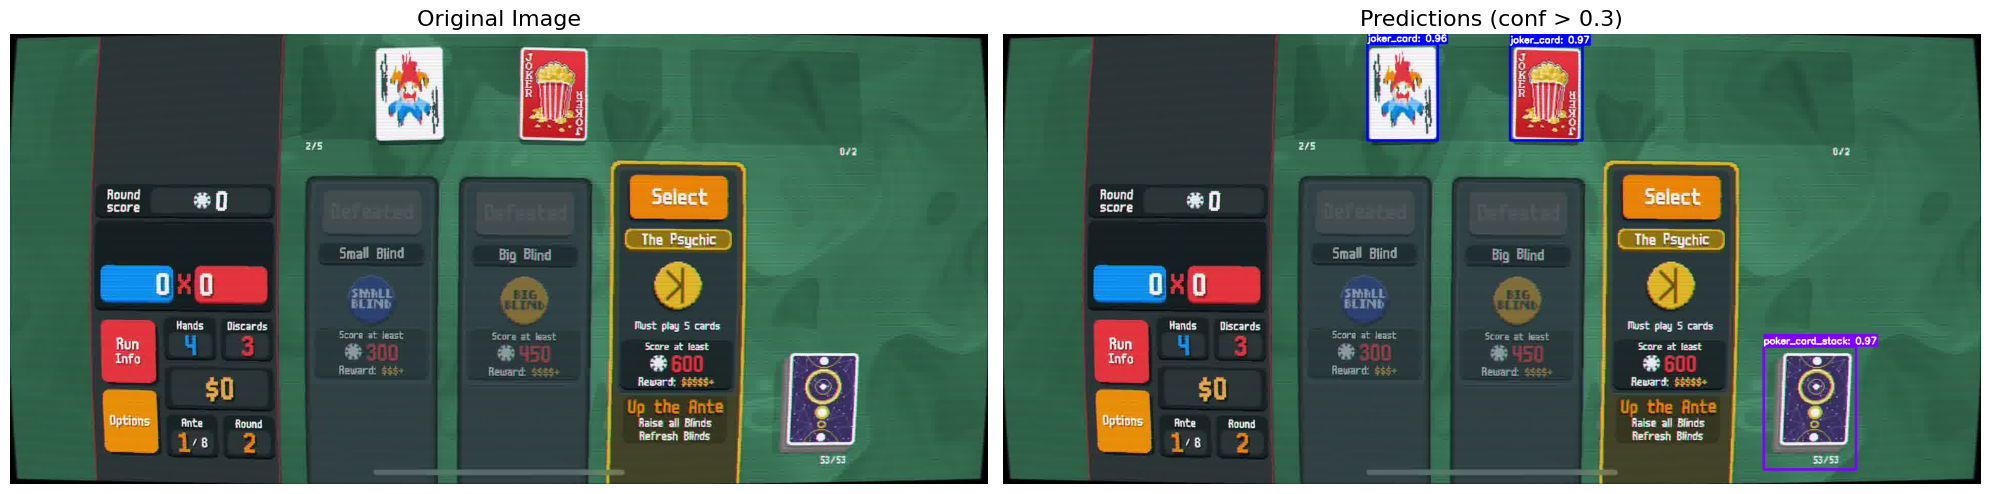


Class Summary:
  joker_card: 2 detections
  poker_card_stack: 1 detections


In [5]:
# Run prediction on the first available image
if available_images:
    test_image = available_images[0]
    print(f'Running prediction on: {test_image}')
    results = visualize_predictions_advanced(test_image, model, conf_threshold=0.3)
else:
    print('No test images found. Please add some images to test.')

Testing advanced visualization:

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg: 320x640 2 joker_cards, 1 poker_card_stack, 2.5ms
Speed: 1.0ms preprocess, 2.5ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/mobile_nekomeowww_2025_09_19_21_54_out_00197_advanced_prediction.png
Annotated image saved to: prediction_outputs/mobile_nekomeowww_2025_09_19_21_54_out_00197_annotated.jpg


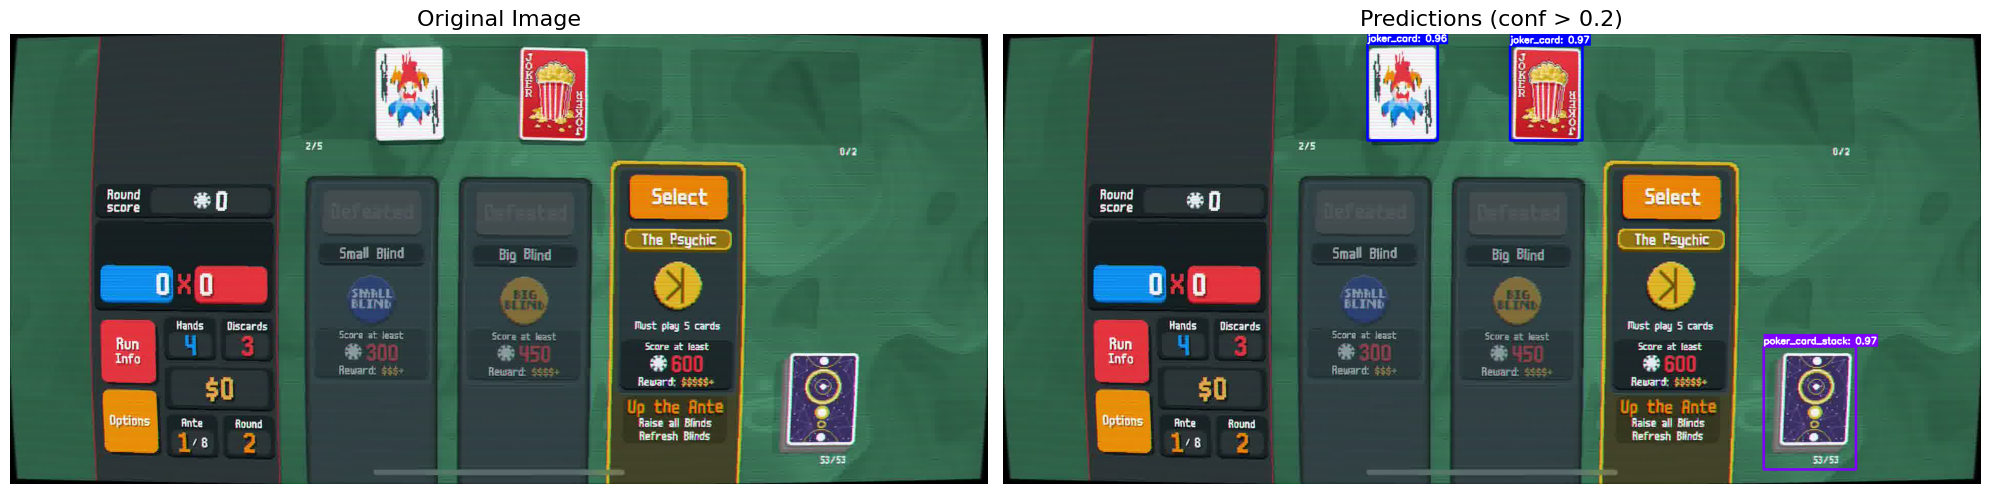


Class Summary:
  joker_card: 2 detections
  poker_card_stack: 1 detections


In [6]:
# Test the advanced visualization
if available_images:
    print('Testing advanced visualization:')
    results = visualize_predictions_advanced(
        available_images[0], model, conf_threshold=0.2
    )


Testing: ../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-ui-detection/data/train/yolo/images/mobile_nekomeowww_2025_09_19_21_54_out_00197.jpg: 320x640 2 joker_cards, 1 poker_card_stack, 2.5ms
Speed: 0.8ms preprocess, 2.5ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/mobile_nekomeowww_2025_09_19_21_54_out_00197_advanced_prediction.png
Annotated image saved to: prediction_outputs/mobile_nekomeowww_2025_09_19_21_54_out_00197_annotated.jpg


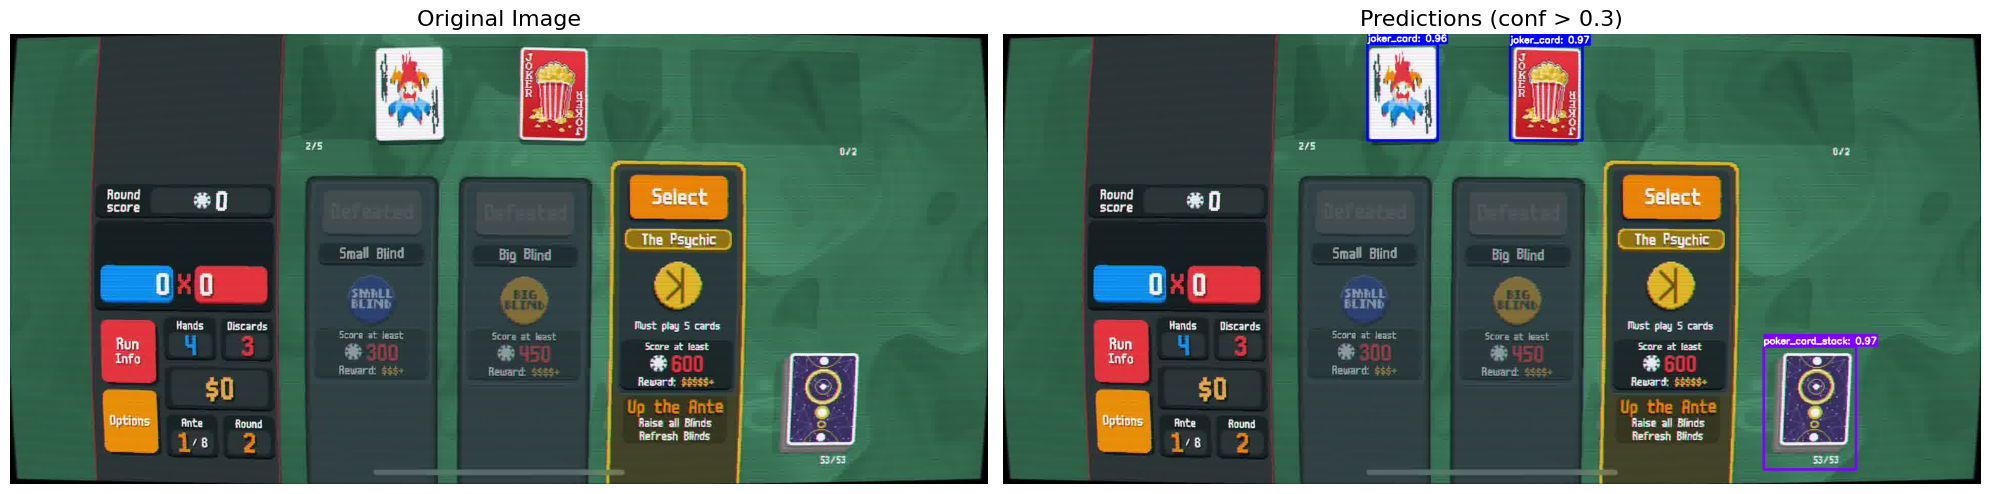


Class Summary:
  joker_card: 2 detections
  poker_card_stack: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00067.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00067.jpg: 320x640 2 joker_cards, 2 planet_cards, 8 poker_card_fronts, 1 poker_card_stack, 2.5ms
Speed: 0.9ms preprocess, 2.5ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/out_00067_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_00067_annotated.jpg


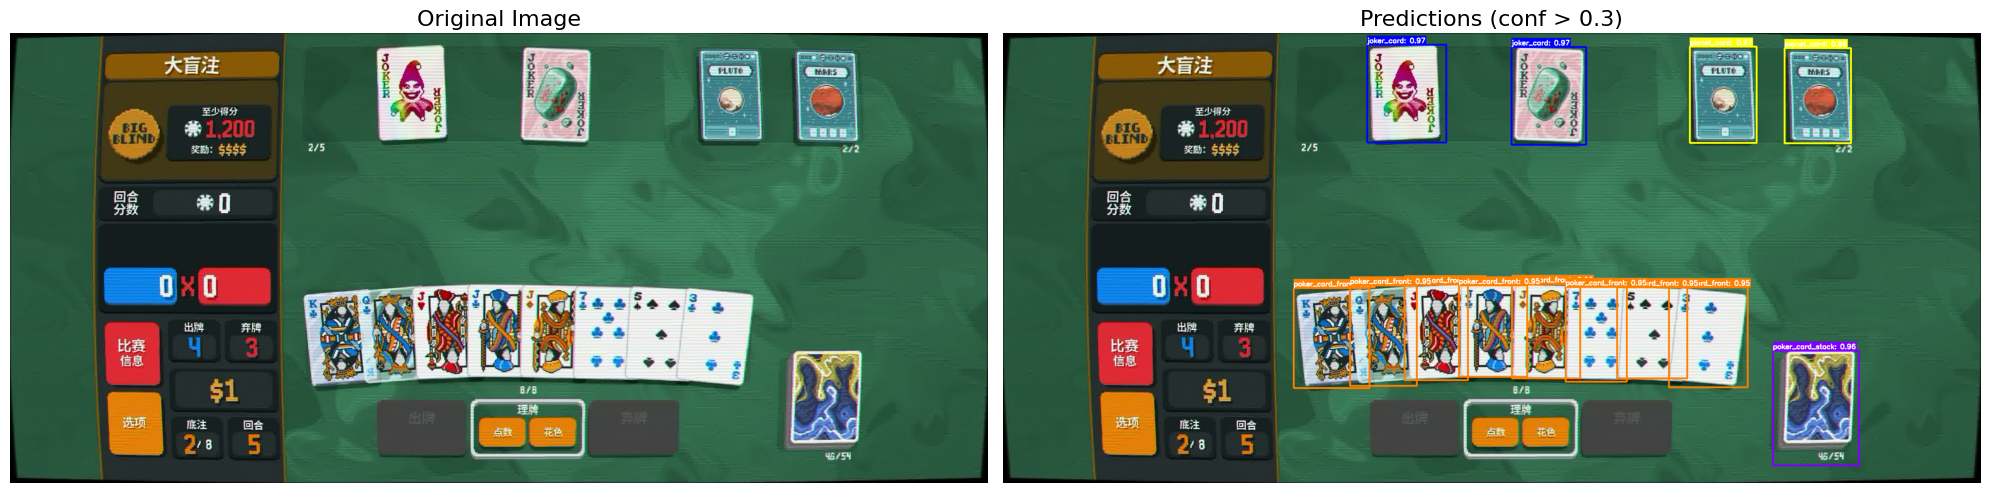


Class Summary:
  planet_card: 2 detections
  joker_card: 2 detections
  poker_card_front: 8 detections
  poker_card_stack: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_01234.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_01234.jpg: 320x640 2 card_packs, 6 joker_cards, 1 planet_card, 1 poker_card_stack, 2.5ms
Speed: 0.8ms preprocess, 2.5ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/out_01234_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_01234_annotated.jpg


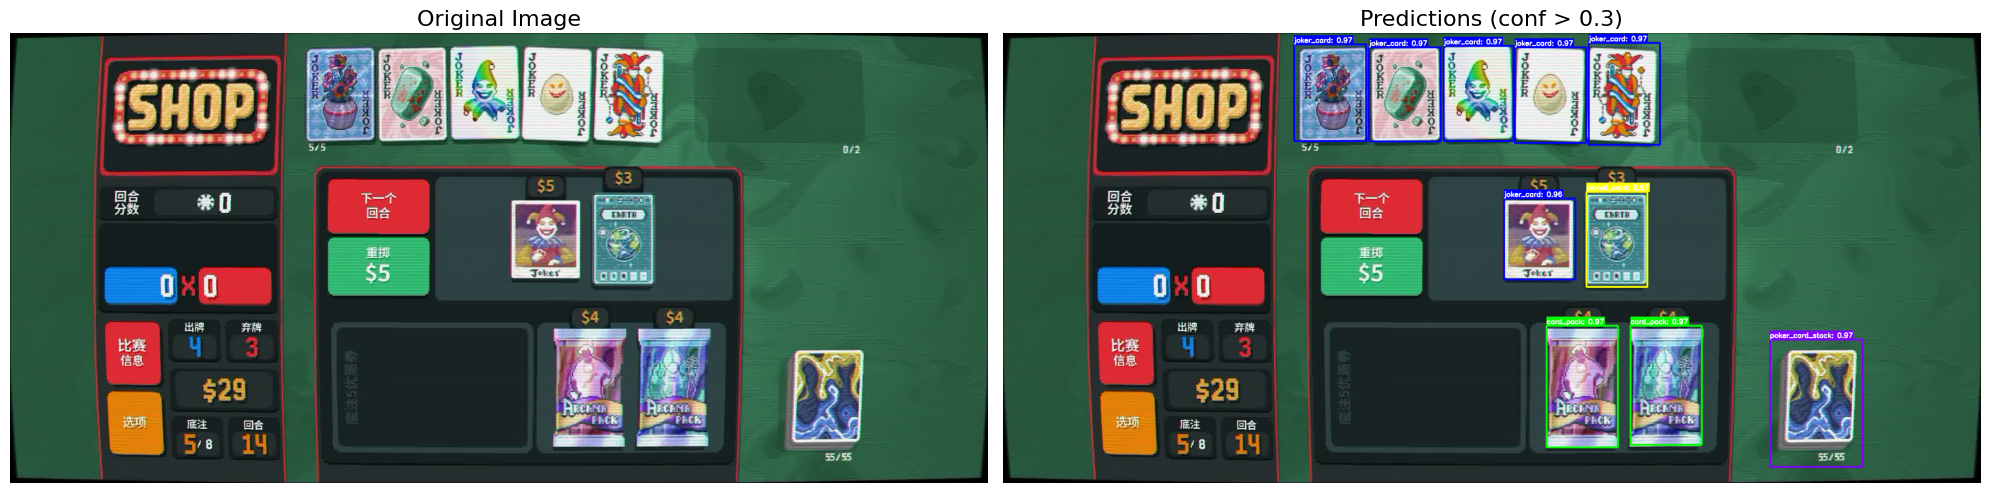


Class Summary:
  card_pack: 2 detections
  planet_card: 1 detections
  joker_card: 6 detections
  poker_card_stack: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00169.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00169.jpg: 320x640 4 card_descriptions, 2 joker_cards, 3 poker_card_fronts, 1 poker_card_stack, 4 spectral_cards, 2.4ms
Speed: 0.8ms preprocess, 2.4ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/out_00169_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_00169_annotated.jpg


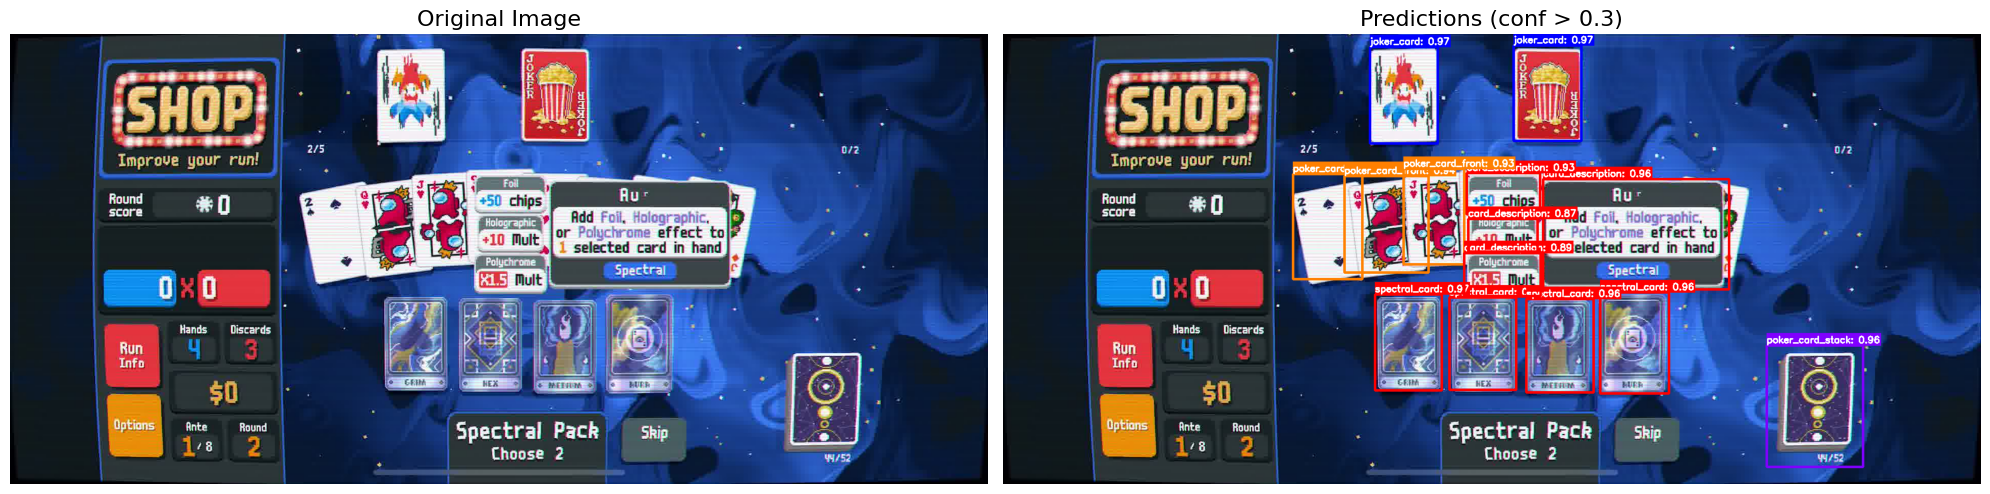


Class Summary:
  spectral_card: 4 detections
  joker_card: 2 detections
  card_description: 4 detections
  poker_card_stack: 1 detections
  poker_card_front: 3 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00495.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00495.jpg: 320x640 5 joker_cards, 2 poker_card_backs, 6 poker_card_fronts, 1 poker_card_stack, 2.4ms
Speed: 0.8ms preprocess, 2.4ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/out_00495_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_00495_annotated.jpg


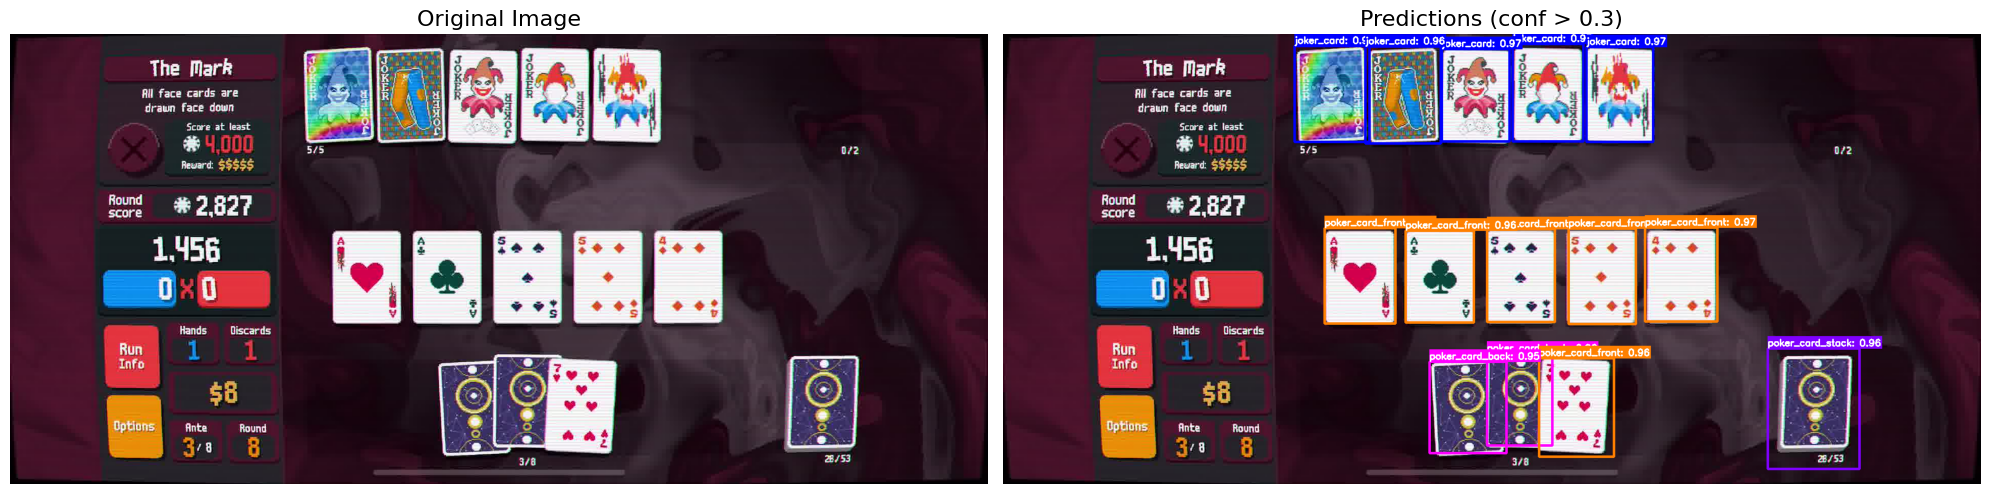


Class Summary:
  joker_card: 5 detections
  poker_card_front: 6 detections
  poker_card_stack: 1 detections
  poker_card_back: 2 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00519.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/notebooks/train/../../data/datasets/games-balatro-2024-entities-detection/data/train/yolo/images/out_00519.jpg: 320x640 5 joker_cards, 2 poker_card_backs, 4 poker_card_fronts, 1 poker_card_stack, 2.6ms
Speed: 0.8ms preprocess, 2.6ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)
Visualization saved to: prediction_outputs/out_00519_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_00519_annotated.jpg


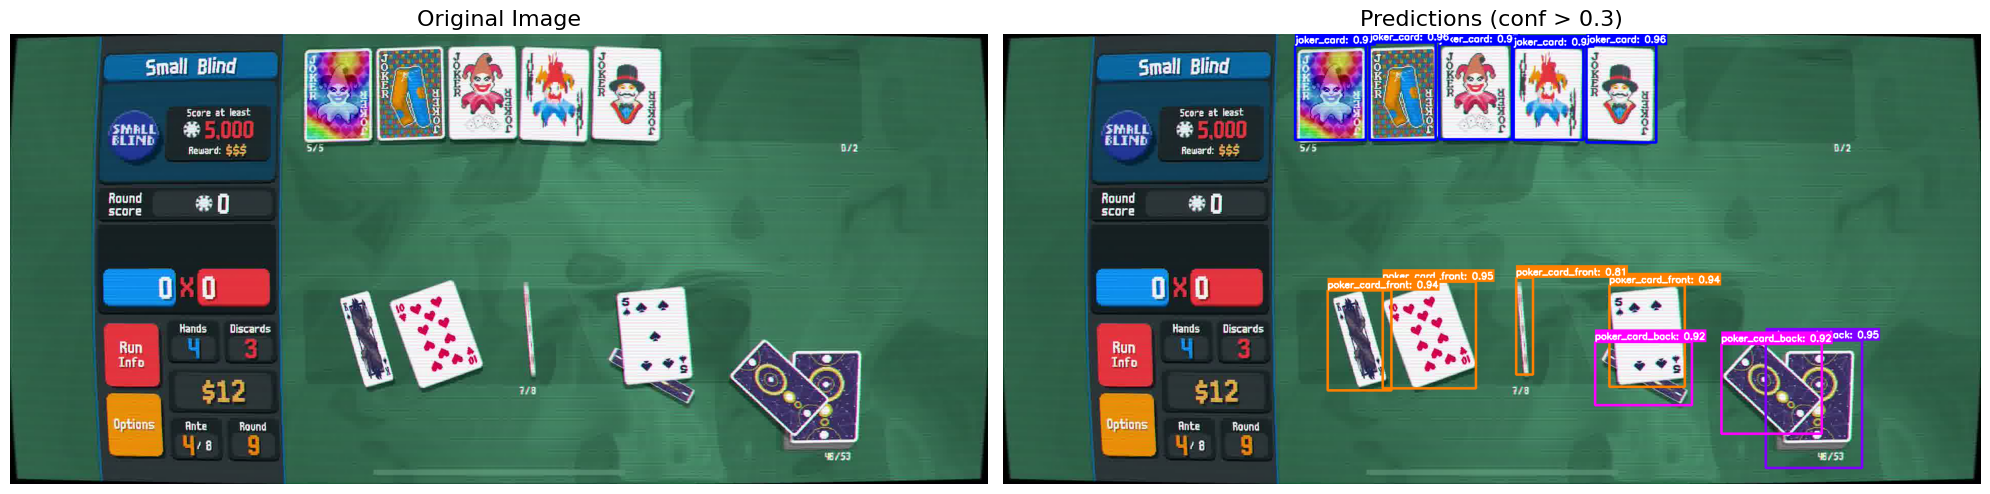


Class Summary:
  joker_card: 5 detections
  poker_card_front: 4 detections
  poker_card_stack: 1 detections
  poker_card_back: 2 detections


In [7]:
# Test all available images
for image_path in available_images:
    print(f'\n{"=" * 50}')
    print(f'Testing: {image_path}')
    print(f'{"=" * 50}')
    visualize_predictions_advanced(image_path, model, conf_threshold=0.3)